In [1]:
import os
import tensorflow as tf
tf.config.list_physical_devices('GPU')
img_size = 150
batch_size = 16

In [2]:
tf_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    rescale= 1/255.0

)

train_gen = tf_generator.flow_from_directory(

    os.getcwd()+"/cats_and_dogs_filtered/train",
    target_size=(img_size, img_size),
    class_mode= 'binary', #'categorical',
    batch_size=batch_size,
    shuffle=True,
    
)

test_gen = tf_generator.flow_from_directory(
    os.getcwd()+"/cats_and_dogs_filtered/test",
    target_size=(img_size, img_size),
    class_mode='binary', #'categorical',
    batch_size=batch_size,
    shuffle=True,
)


#By calling .repeat(), the dataset will loop indefinitely, providing data for all the epochs.

Found 2752 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


16
1.0
(150, 150, 3)


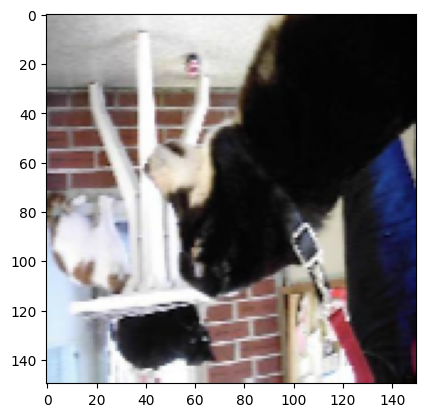

In [3]:
### test Generator
import matplotlib.pyplot as plt
import numpy as np
test_img = None
test_label = None
for image,label in test_gen:
    print(len(image))
    test_img = image[0]
    test_label = label[0]
    break
print(test_label)
print(test_img.shape)
plt.imshow(test_img)
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense, Flatten, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam,RMSprop

input_shape = (img_size,img_size,3)
model = Sequential([
    Conv2D(32,kernel_size=(3,3),activation = 'relu', padding = 'same',input_shape = input_shape),
    MaxPool2D(pool_size = (2,2),strides=2),
   
    
    Conv2D(64,kernel_size=(3,3),activation = 'relu'),
    MaxPool2D(pool_size = (2,2),strides=2),

    Flatten(),
    Dense(512,activation = 'relu'),
    Dense(1,activation = 'sigmoid')    
    
])

/Users/tharhtet/.local/share/virtualenvs/tf_best_practices-7uf2K4aY/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-16 13:57:31.212527: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-08-16 13:57:31.212552: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-08-16 13:57:31.212565: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-08-16 13:57:31.212586: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-16 13:57:31.212609: I tensorflow/core/common_runtim

In [5]:
model.summary()
#tf.keras.utils.plot_model(model,show_shapes=True)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,487,745 (162.08 MB)

 Trainable params: 42,487,745 (162.08 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import datetime

batch_size =  batch_size
epochs  = 20


base_learning_rate = 1e-3 #0.0001

from tensorflow.keras.optimizers import RMSprop


optimizer = tf.keras.optimizers.Adam()
#optimizer = RMSprop(learning_rate=0.0001)

#optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)
#model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])



In [7]:
num_train = len(train_gen.filenames)
num_test = len(test_gen.filenames)
steps_per_epoch=int(num_train / batch_size)
print("Number of train : ",num_train)
print(num_test/batch_size)
print(steps_per_epoch)

Number of train :  2752
15.5
172


In [8]:
history = model.fit(train_gen, epochs=epochs,
                            validation_data=test_gen,
                            verbose=1)

Epoch 1/20


2024-08-16 13:57:31.640042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/tharhtet/.local/share/virtualenvs/tf_best_practices-7uf2K4aY/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.5046 - loss: 1.0047 - val_accuracy: 0.4637 - val_loss: 0.6998
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.5438 - loss: 0.6911 - val_accuracy: 0.5806 - val_loss: 0.6695
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.5933 - loss: 0.6739 - val_accuracy: 0.5726 - val_loss: 0.7131
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.6341 - loss: 0.6492 - val_accuracy: 0.6371 - val_loss: 0.6361
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.6178 - loss: 0.6518 - val_accuracy: 0.6532 - val_loss: 0.6446
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.6442 - loss: 0.6282 - val_accuracy: 0.6331 - val_loss: 0.6475
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.6649 - loss: 0.6256 - val_accuracy: 0.6613 - val_loss: 0.6613
Epoch 8/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.6600 - loss: 0.6195 - val_accurac

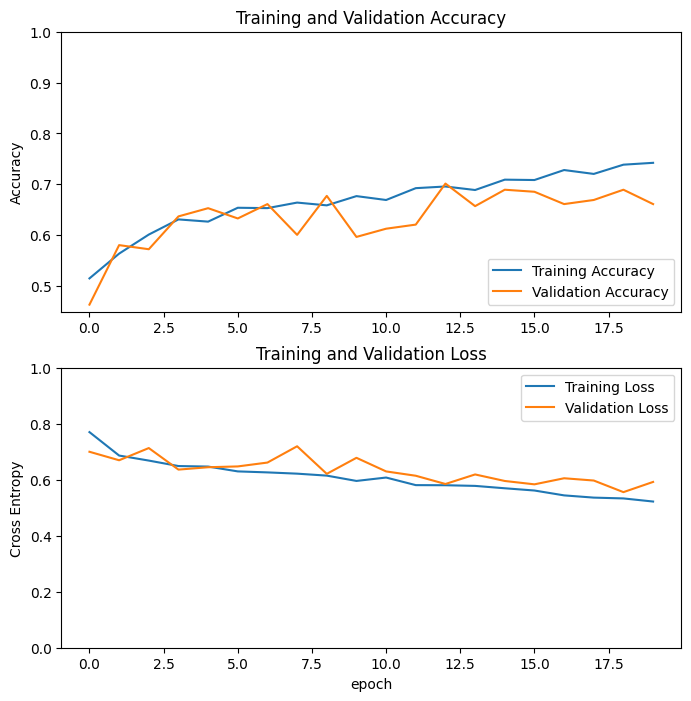

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Check class indices from Data Gen

In [43]:
import json
class_names =  train_gen.class_indices
print("Class indices:",class_names)

class_path = "cat_and_dogs_train/catAndDog_class_names.json"

with open(class_path, 'w') as f:
    json.dump(class_names, f)

Class indices: {'cats': 0, 'dogs': 1}


### Save both architecture and weights

In [36]:
model.save('cat_and_dogs_train/my_tf_model.h5')

In [37]:
from tensorflow.keras.models import load_model

new_model = load_model('cat_and_dogs_train/my_tf_model.h5')
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    42,467,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,487,747 (162.08 MB)

 Trainable params: 42,487,745 (162.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Saving  Weights and Architecture Separately

In [38]:

weight_only_path = 'cat_and_dogs_train/my_tf_model_weight_only.weights.h5'

archi_only_path = 'cat_and_dogs_train/my_tf_model_architecture.json'
model.save_weights(weight_only_path)

with open(archi_only_path, 'w') as f:
    f.write(model.to_json())

In [7]:
import cv2
import os
import json
import numpy as np
import tensorflow as tf


weight_only_path = 'cat_and_dogs_train/my_tf_model_weight_only.weights.h5'

archi_only_path = 'cat_and_dogs_train/my_tf_model_architecture.json'



from tensorflow.keras.models import model_from_json

# Load model architecture
with open(archi_only_path, 'r') as f:
    model_json = f.read()
new_model_2 = model_from_json(model_json)

# Load weights
new_model_2.load_weights(weight_only_path)

"""
eval_loss, eval_acc = new_model_2.evaluate(test_gen)

print('Eval loss: {}, Eval accuracy: {}'.format(eval_loss, eval_acc))
"""

/Users/tharhtet/.local/share/virtualenvs/tf_best_practices-7uf2K4aY/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


"\neval_loss, eval_acc = new_model_2.evaluate(test_gen)\n\nprint('Eval loss: {}, Eval accuracy: {}'.format(eval_loss, eval_acc))\n"

In [9]:


class_path = "cat_and_dogs_train/catAndDog_class_names.json"
with open(class_path, 'r') as f:
    class_names = json.load(f)


def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = cv2.imread(img_path)
    image = tf.cast(img, tf.float32)
    image = tf.image.resize(image, [150, 150])
    image /= 255.0  # Normalize if needed
    img_reshape = np.array([image])
    return img_reshape


def binary_classification(predictions,class_names):
    if predictions.shape[1] == 1:  # Binary classification
        predicted_class = (predictions > 0.5).astype("int32")
    else:  # Multi-class classification
        predicted_class = np.argmax(predictions, axis=1)

    for k,v in class_names.items():
        if v == predicted_class:
            return k


img_path = os.getcwd()+'/cats_and_dogs_filtered/test/cats/cat.2366.jpg'
img_path = os.getcwd()+'/cats_and_dogs_filtered/test/dogs/dog.2360.jpg'

preprocessed_img = load_and_preprocess_image(img_path)

# Predict
predictions = new_model_2.predict(preprocessed_img)
print("Predictions : ", predictions)







predicted_class = binary_classification(predictions,class_names)
print("predicted_class : ",predicted_class)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predictions :  [[0.7297323]]
predicted_class :  dogs


2024-08-16 14:39:21.736202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
